## CNN drill

### Thanks python engineer!

# 4x4 -> 2x2 max pool (reduces computational cost, num params (against overfitting) and makes abstract features)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader as DataLoader
import torchvision as tv
import torchvision.transforms as trans
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Hyperparameters
n_epochs = 5
batch_size = 4
learning_rate = 0.001

In [13]:
# Load and prepare data (convert images to tensors and normalize)
transform = trans.Compose([trans.ToTensor(), trans.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = tv.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = tv.datasets.CIFAR10('./data',train=False,download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(train_loader)

Files already downloaded and verified
Files already downloaded and verified


<function matplotlib.pyplot.show(close=None, block=None)>

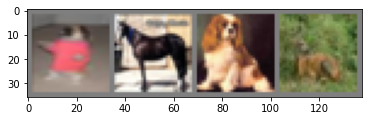

In [20]:
# Visualize some examples
images, labels = dataiter.next() # next BATCH
images_grid = tv.utils.make_grid(images) / 2 + 0.5 # unnormalize
plt.imshow(np.transpose(images_grid.numpy(), (1,2,0)))
plt.show

In [50]:
# Implement convolutional network

class CNN(nn.Module):  # "lenet5"
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in:3 (rgb), 6 out (hidden) channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16*5*5, 120) # flatten: torch.Size([4, 16, 5, 5]) 16x5x5 = 400
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5) # flatten by view (-1 = 4 batch_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # no activation since cross entropy loss
        return x

In [41]:
# Print and inspect dimensions

# Output: (W-F + 2P)/S + 1

print(images.shape) # torch.Size([4, 3, 32, 32])  (batch_size=4) x rgb x 32 x 32

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)

x = conv1(images)  # (32-5 + 2*0)/1 + 1 = 28 -> Correct
print(x.shape) # torch.Size([4, 6, 28, 28])
x = pool(x)       # (stride = 2 -> 28/2 = 14
print(x.shape) # torch.Size([4, 6, 14, 14])
x = conv2(x)      # (14-5 + 2*0)/1 + 1 = 10 
print(x.shape) # torch.Size([4, 16, 10, 10])
x = pool(x)      # (Stride = 2 -> 10/2 = 5)
print(x.shape) # torch.Size([4, 16, 5, 5])


torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [54]:
# Instantiate and train

model = CNN()
CELoss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_steps = len(train_loader)

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = CELoss(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch: {epoch+1}/{n_epochs} | Step: {i+1} / {n_steps} | Loss: {loss.item():.4f}')


Epoch: 1/5 | Step: 2000 / 12500 | Loss: 2.3103
Epoch: 1/5 | Step: 4000 / 12500 | Loss: 2.3156
Epoch: 1/5 | Step: 6000 / 12500 | Loss: 2.3036
Epoch: 1/5 | Step: 8000 / 12500 | Loss: 2.2095
Epoch: 1/5 | Step: 10000 / 12500 | Loss: 2.1764
Epoch: 1/5 | Step: 12000 / 12500 | Loss: 1.9910
Epoch: 2/5 | Step: 2000 / 12500 | Loss: 1.7895
Epoch: 2/5 | Step: 4000 / 12500 | Loss: 1.6909
Epoch: 2/5 | Step: 6000 / 12500 | Loss: 2.0732
Epoch: 2/5 | Step: 8000 / 12500 | Loss: 1.5186
Epoch: 2/5 | Step: 10000 / 12500 | Loss: 1.3239
Epoch: 2/5 | Step: 12000 / 12500 | Loss: 1.5469
Epoch: 3/5 | Step: 2000 / 12500 | Loss: 1.9788
Epoch: 3/5 | Step: 4000 / 12500 | Loss: 1.5231
Epoch: 3/5 | Step: 6000 / 12500 | Loss: 0.9133
Epoch: 3/5 | Step: 8000 / 12500 | Loss: 2.8453
Epoch: 3/5 | Step: 10000 / 12500 | Loss: 0.9318
Epoch: 3/5 | Step: 12000 / 12500 | Loss: 1.8459
Epoch: 4/5 | Step: 2000 / 12500 | Loss: 1.8820
Epoch: 4/5 | Step: 4000 / 12500 | Loss: 1.8534
Epoch: 4/5 | Step: 6000 / 12500 | Loss: 0.9731
Epoch: 

In [56]:
# Do some predictions

with torch.no_grad():
    n_correct = 0
    n_samples = 0

    class_correct = [0 for i in range(10)]
    class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1) # torch.max(value, index)

        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                class_correct[label] += 1
            class_samples[label] += 1

    print(f'Accuracy: {n_correct/n_samples}')

    for i in range(10):
        print(f'Accuracy of class: {i}: {class_correct[i] / class_samples[i]}')

Accuracy: 0.5028
Accuracy of class: 0: 0.526
Accuracy of class: 1: 0.553
Accuracy of class: 2: 0.386
Accuracy of class: 3: 0.338
Accuracy of class: 4: 0.45
Accuracy of class: 5: 0.29
Accuracy of class: 6: 0.574
Accuracy of class: 7: 0.592
Accuracy of class: 8: 0.743
Accuracy of class: 9: 0.576


In [ ]:
# No too impressive...